# **Análise de Vendas de uma Lojinha Online**

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('vendas.csv')
df

,id_venda,data,produto,categoria,quantidade,preco_unitario
0,1,2025-01-03,Camiseta Básica,Vestuário,2,39.9
1,2,2025-01-04,Mouse Óptico,Eletrônicos,1,59.9
2,3,2025-01-04,Caneca Personalizada,Utilidades,3,24.9
3,4,2025-01-05,Teclado Mecânico,Eletrônicos,1,199.9
4,5,2025-01-06,Meia Esportiva,Vestuário,5,9.9
5,6,2025-01-06,Quadro Decorativo,Decoração,1,79.9
6,7,2025-01-07,Caderno 100 folhas,Papelaria,4,14.9
7,8,2025-01-07,Capinha para Celular,Acessórios,2,29.9
8,9,2025-01-08,Fone de Ouvido,Eletrônicos,1,99.9
9,10,2025-01-08,Boné Casual,Vestuário,1,49.9


## **Valor da Receita:** R$ 1197.40

In [4]:
df['receita'] = df['preco_unitario'] * df['quantidade']

venda_total = df['receita'].sum()
print(f'O valor total da receita é de: R$ {venda_total:.2f}')

O valor total da receita é de: R$ 1197.40


## **Valores por Categoria**

Categoria que gerou **maior** receita: **Eletrônicos** --> 479,5  
Categoria que gerou **menor** receita: **Acessórios** --> 59.8

In [5]:
receita_por_categoria = df.groupby('categoria')['receita'].sum()
print(receita_por_categoria)
df

categoria
Acessórios      59.8
Decoração      209.8
Eletrônicos    479.5
Papelaria       84.6
Utilidades     144.6
Vestuário      219.1
Name: receita, dtype: float64


,id_venda,data,produto,categoria,quantidade,preco_unitario,receita
0,1,2025-01-03,Camiseta Básica,Vestuário,2,39.9,79.8
1,2,2025-01-04,Mouse Óptico,Eletrônicos,1,59.9,59.9
2,3,2025-01-04,Caneca Personalizada,Utilidades,3,24.9,74.7
3,4,2025-01-05,Teclado Mecânico,Eletrônicos,1,199.9,199.9
4,5,2025-01-06,Meia Esportiva,Vestuário,5,9.9,49.5
5,6,2025-01-06,Quadro Decorativo,Decoração,1,79.9,79.9
6,7,2025-01-07,Caderno 100 folhas,Papelaria,4,14.9,59.6
7,8,2025-01-07,Capinha para Celular,Acessórios,2,29.9,59.8
8,9,2025-01-08,Fone de Ouvido,Eletrônicos,1,99.9,99.9
9,10,2025-01-08,Boné Casual,Vestuário,1,49.9,49.9


## **Produto mais e menos vendido**

In [6]:
vendas_por_produto = df.groupby('produto')['quantidade'].sum().sort_values()
vendas_por_produto

produto
Boné Casual              1
Garrafa Térmica          1
Fone de Ouvido           1
Luminária de Mesa        1
Quadro Decorativo        1
Teclado Mecânico         1
Capinha para Celular     2
Camiseta Básica          3
Caneca Personalizada     3
Mouse Óptico             3
Caderno 100 folhas       4
Meia Esportiva           5
Caneta Azul             10
Name: quantidade, dtype: int64

### Mais vendido: **Caneta Azul -->** 10u

In [7]:
produto_mais_vendido = vendas_por_produto.idxmax()
quantidade_mais_vendida = vendas_por_produto.max()
print(produto_mais_vendido, quantidade_mais_vendida)

Caneta Azul 10


### Lista de produtos menos vendidos: 1u

In [8]:
min_vendas = vendas_por_produto.min()
produtos_menos = vendas_por_produto[vendas_por_produto == min_vendas]
print(produtos_menos)

produto
Boné Casual          1
Garrafa Térmica      1
Fone de Ouvido       1
Luminária de Mesa    1
Quadro Decorativo    1
Teclado Mecânico     1
Name: quantidade, dtype: int64


## **Receita média por categoria**

In [9]:
receita_media_por_categoria = df.groupby('categoria')['receita'].mean()
print(receita_media_por_categoria)

categoria
Acessórios      59.800
Decoração      104.900
Eletrônicos    119.875
Papelaria       42.300
Utilidades      72.300
Vestuário       54.775
Name: receita, dtype: float64


## **Produto mais e menos lucrativo**

### Produto mais lucrativo: **Teclado Mecânico** --> R$ 199,9

In [10]:
produto_mais_lucrativo = df.loc[df['receita'].idxmax()]
print(produto_mais_lucrativo)

id_venda                         4
data                    2025-01-05
produto           Teclado Mecânico
categoria              Eletrônicos
quantidade                       1
preco_unitario               199.9
receita                      199.9
Name: 3, dtype: object


### Produto menos lucrativo: **Caneta Azul** --> R$ 25

In [11]:
receita_por_produto = df.groupby('produto')['receita'].sum().sort_values()

produto_menos_lucrativo = receita_por_produto.idxmin()
receita_menos_lucrativa = receita_por_produto.min()

print(produto_menos_lucrativo, receita_menos_lucrativa)

Caneta Azul 25.0


## **Métricas Gerais**

In [12]:
df[['quantidade', 'preco_unitario', 'receita']].describe()

,quantidade,preco_unitario,receita
count,15.000000,15.000000,15.000000
mean,2.400000,60.740000,79.826667
std,2.443651,51.709474,43.648964
min,1.000000,2.500000,25.000000
25%,1.000000,27.400000,54.750000
50%,1.000000,49.900000,69.900000
75%,2.500000,74.900000,89.900000
max,10.000000,199.900000,199.900000


## **Receita por Categoria (Gráfico de Barras)**

C:\Users\guibi\AppData\Local\Temp\ipykernel_15488\825052684.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=receita_categoria.index, y=receita_categoria.values, palette="viridis")


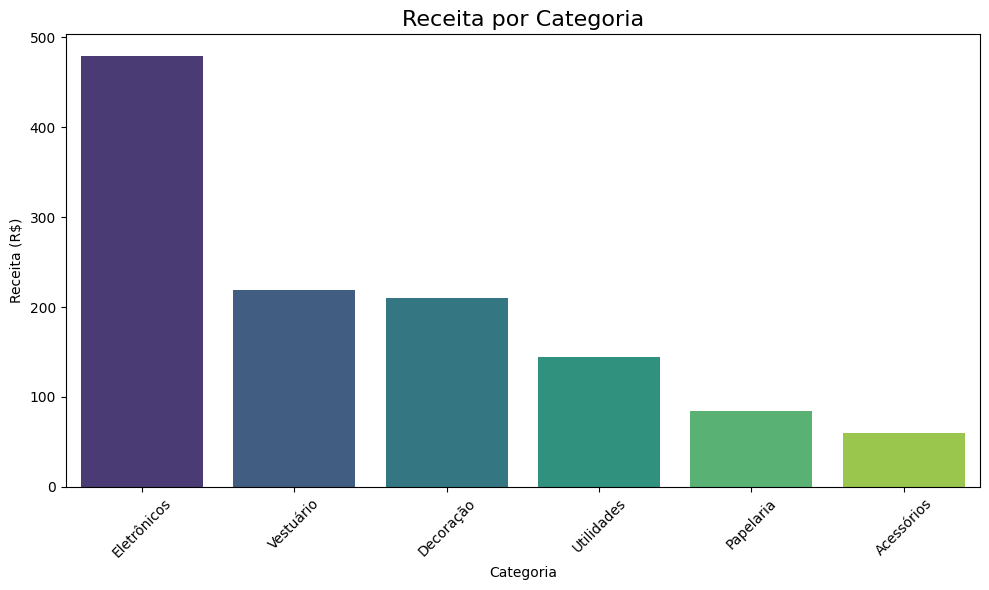

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Receita por categoria
receita_categoria = df.groupby('categoria')['receita'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=receita_categoria.index, y=receita_categoria.values, palette="viridis")

plt.title("Receita por Categoria", fontsize=16)
plt.xlabel("Categoria")
plt.ylabel("Receita (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Vendas por Produto (Gráfico de Ranking)**

C:\Users\guibi\AppData\Local\Temp\ipykernel_15488\4270674428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_produto.values, y=vendas_produto.index, palette="magma")


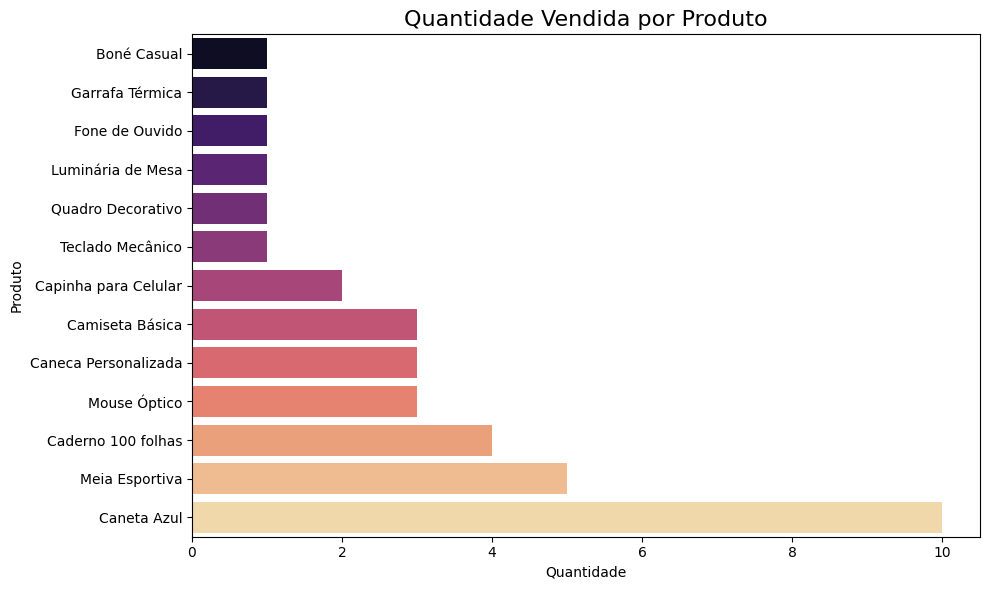

In [14]:
vendas_produto = df.groupby('produto')['quantidade'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_produto.values, y=vendas_produto.index, palette="magma")

plt.title("Quantidade Vendida por Produto", fontsize=16)
plt.xlabel("Quantidade")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()